In [1]:
# !pip install art

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()



x_test = np.load('/home/jovyan/MQTTset/x_test.npy')
x_train = np.load('/home/jovyan/MQTTset/x_train.npy')
x_val = np.load('/home/jovyan/MQTTset/x_val.npy')
y_test = np.load('/home/jovyan/MQTTset/y_test.npy')
y_train = np.load('/home/jovyan/MQTTset/y_train.npy')
y_val = np.load('/home/jovyan/MQTTset/y_val.npy')

2024-02-27 21:31:18.182573: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 21:31:18.224160: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 21:31:18.224232: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 21:31:18.225836: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 21:31:18.233570: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 21:31:18.237073: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Dense(50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
dnn_model.add(Dense(30, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
dnn_model.add(Dense(20, kernel_initializer='normal'))
dnn_model.add(Dense(6,activation='softmax'))
dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
# history = dnn_model.fit(x_train,y_train,validation_data=(x_val,y_val),callbacks=[monitor],verbose=2,epochs=20,batch_size=1000) 
classifier = KerasClassifier(model=dnn_model, use_logits=False)
classifier.fit(x_train, y_train, nb_epochs=10, batch_size=1000,validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-02-27 21:31:22.294335: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-27 21:31:22.325408: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-27 21:31:22.349941: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense_3/kernel/m/Assign' id:292 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_3/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_3/kernel/m, training/Adam/dense_3/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning

Test accuracy: 0.8379595


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-02-27 21:31:28.649591: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_3/Softmax' id:94 op device:{requested: '', assigned: ''} def:{{{node dense_3/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


start


/tmp/ipykernel_24206/2524390826.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  x_test_adv = adv_crafter.generate(x=x_test, y=y_test)
JSMA: 100%|██████████| 1552/1552 [02:43<00:00,  9.50it/s]


theta = 0.1
FPR: [0. 0. 0. 0. 0. 0.]
TPR: [1. 1. 1. 1. 1. 1.]
FNR: [0. 0. 0. 0. 0. 0.]
TNR: [1. 1. 1. 1. 1. 1.]
Accuracy: 1.0
Precision(micro,macro,weighted): 1.0,1.0,1.0
F1(micro,macro,weighted: 1.0,1.0,1.0
FPR: 0.0
tpr: 1.0
fnr: 0.0
tnr: 1.0


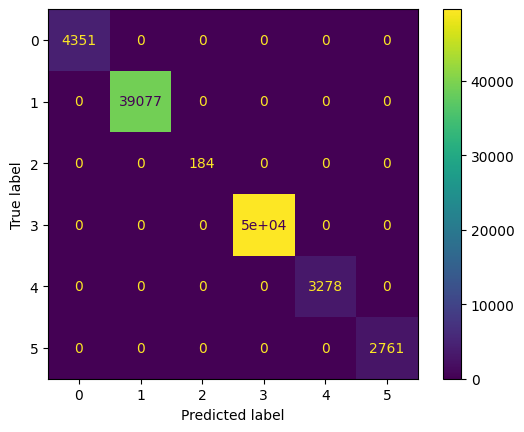

/tmp/ipykernel_24206/2524390826.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  x_test_adv = adv_crafter.generate(x=x_test, y=y_test)
JSMA: 100%|██████████| 1552/1552 [01:50<00:00, 14.07it/s]


theta = 0.15
FPR: [0. 0. 0. 0. 0. 0.]
TPR: [1. 1. 1. 1. 1. 1.]
FNR: [0. 0. 0. 0. 0. 0.]
TNR: [1. 1. 1. 1. 1. 1.]
Accuracy: 1.0
Precision(micro,macro,weighted): 1.0,1.0,1.0
F1(micro,macro,weighted: 1.0,1.0,1.0
FPR: 0.0
tpr: 1.0
fnr: 0.0
tnr: 1.0


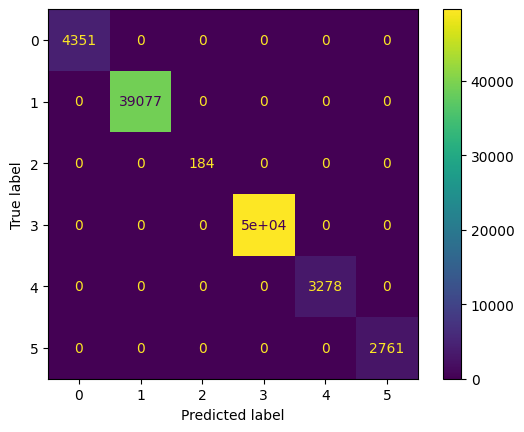

/tmp/ipykernel_24206/2524390826.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  x_test_adv = adv_crafter.generate(x=x_test, y=y_test)
JSMA:  10%|▉         | 151/1552 [00:24<00:46, 30.04it/s]

In [ ]:
print("start")
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import SaliencyMapMethod

theta_values = [0.1, 0.15, 0.2, 0.25, 0.3]

# Iterate over epsilon values
for theta in theta_values:
    # Craft adversarial samples with FGSM
    adv_crafter = SaliencyMapMethod(classifier, theta=theta, batch_size = 64)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"theta = {theta}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "jsma",
        "theta" : theta,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/MQTTset/modeldnn.csv", mode='a', index=False)

print("done")